In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [119]:
df = pd.read_csv("C:/diabetes.csv")

In [121]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [125]:
#zliczamy wartości 0 w kolumnach

(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [127]:
#zamieniamy 0 na medianę

columns_to_fix = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in columns_to_fix:
    median = df[df[column] != 0][column].median()  # obliczamy medianę z wartości niezerowych
    df[column] = df[column].replace(0, median)
print(df[columns_to_fix].describe())

          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.386719      29.108073  140.671875   32.455208
std     30.438286      12.096642       8.791221   86.383060    6.875177
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      25.000000  121.500000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.300000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


In [129]:
(df == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [131]:
#podział na X - dane wejściowe(cechy), y - etykieta

X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [133]:
#podział dane na treningowe i testowe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
#tworzymy drzewo decyzyjne

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [137]:
#oceniamy accuracy

y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


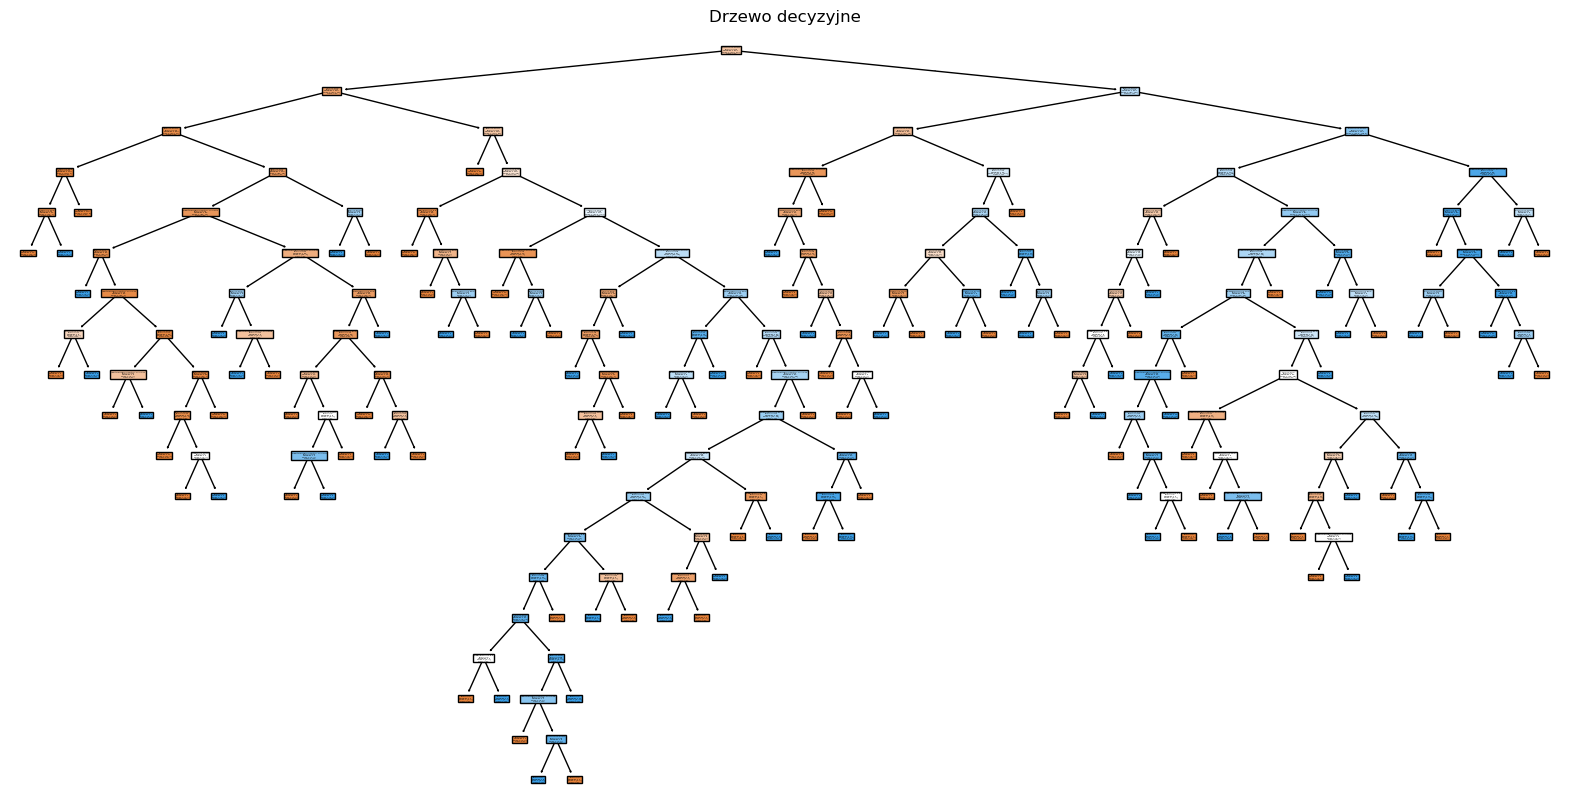

In [148]:
#rysujemy drzewo

plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.title("Drzewo decyzyjne")
plt.show()

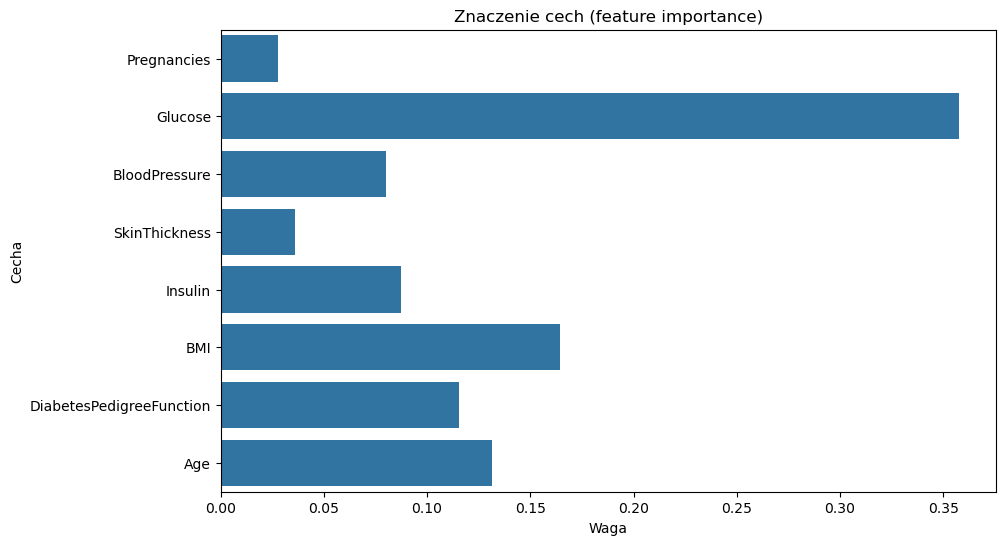

In [152]:
#wykres cech

importances = tree.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Znaczenie cech (feature importance)')
plt.xlabel('Waga')
plt.ylabel('Cecha')
plt.show()

Porównanie modeli – Logistic Regression vs Decision Tree

Dodajemy drugi model – regresję logistyczną – i porównujemy skuteczność (accuracy) z modelem drzewa decyzyjnego.


In [156]:
# Model regresji logistycznej
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predykcja i ocena
y_pred_log = logreg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Accuracy – Logistic Regression: {acc_log:.2f}")


Accuracy – Logistic Regression: 0.75


In [158]:
#porównujemy wyniki dwóch modeli

y_pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy – Decision Tree: {acc_tree:.2f}")

Accuracy – Decision Tree: 0.72


In [160]:
models = ['Decision Tree', 'Logistic Regression']
accuracies = [acc_tree, acc_log]

for m, a in zip(models, accuracies):
    print(f"{m}: {a:.2f}")


Decision Tree: 0.72
Logistic Regression: 0.75
